<a href="https://colab.research.google.com/github/oztuka/IS584/blob/main/Basic_NLP_%C3%96zkan_Tu%C4%9Fberk_Kartal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/volgasezen/is584/blob/main/Lab 1/Basic NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="margin-bottom:0">IS 584: Deep Learning for Text Analytics</h1>

<h3 style="margin-top:0">Lab 1: Basic Natural Language Processing (NLP)</h2>
<h4 style="margin-top:0">Given by Volga Sezen</h4>
<i>Originally created by Özgün Ozan Kılıç. Thanks to Arif Ozan Kızıldağ for feedback.</i>
<br>
<br>

In this lab, we will process some tweets that include the hashtag "#covid19" to obtain their normalized versions which can be used in various analyses. The dataset we will use is obtained through filtering out non-complete tweets of [a public Kaggle dataset](https://www.kaggle.com/gpreda/covid19-tweets). You can later apply the same processes to your own datasets.

-----

## Setting up<a id="colab"></a>

If your local (or cloud) environment doesn't have the packages listed below, you can run the cell block below to install them. If you don't have a local python environment, you can use Google Colab instead. Through Colab you can access a free virtual machine with a dedicated python environment. You execute python commands via ipython notebooks primarily.

In [101]:
!pip install contractions
!pip install langdetect
!pip install autocorrect
!pip install emoji
!pip install python-Levenshtein
!pip install snowballstemmer
!pip install zeyrek

Executing the following command will download the filtered version of covid tweets from our repository.

In [102]:
!wget "https://raw.githubusercontent.com/volgasezen/is584/main/Lab 1/covid19_tweets_filtered.csv"

--2025-02-24 21:12:34--  https://raw.githubusercontent.com/volgasezen/is584/main/Lab%201/covid19_tweets_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14531717 (14M) [text/plain]
Saving to: ‘covid19_tweets_filtered.csv.1’

covid19_tweets_filt 100%[===================>]  13.86M  --.-KB/s    in 0.07s   

2025-02-24 21:12:34 (210 MB/s) - ‘covid19_tweets_filtered.csv.1’ saved [14531717/14531717]



## Regex

When we need to modify text files before further processing, we could utilize python's string default string methods. These methods allow us to do some simple operations on our input strings.

In [103]:
dum_text = "look_here"
dum_text.split(r"k")

['loo', '_here']

In [104]:
dum_text.lower()

'look_here'

In [105]:
dum_text.find("_")

4

Although Python's default operations help us in essential modifications, we need to utilize regular expressions. For this purpose, we will use the `re` library to use our regular expression patterns on an input text. `re` library gives different options to utilize regular expressions like search(), findall(), sub(), and split(). Let's check a few of them.

In [106]:
import re
print(re.match("my","findmyphone"))
re.match("find","findmyphone")

None


<re.Match object; span=(0, 4), match='find'>

In [107]:
re.search(r'n.*r', 'number 6r').group()

'number 6r'

In [108]:
re.findall(r'[0-9]','2 times 3 is equalto 6')

['2', '3', '6']

In [109]:
re.sub("small","big",'This tree is small.')

'This tree is big.'

> The company's database is critical to their business operations. They have a dedicated team that ensures the accuracy and security of the database. However, there was an issue that caused the loss of some important data. The team is currently working to recover the lost ***data*** and improve the overall database system.

Considering the above text, Create a regex that will match only the bold word .

Tip: use `findall` function

In [110]:
text = '''The company's database is critical to their business operations.
          They have a dedicated team that ensures the accuracy and security
          of the database. However, there was an issue that caused the loss
          of some important data. The team is currently working to recover
          the lost data and improve the overall database system.'''

myregex = r"data"
print(re.findall(myregex,text))
re.search(myregex,text)

['data', 'data', 'data', 'data', 'data']


<re.Match object; span=(14, 18), match='data'>

In [111]:
# myregex = ## FILL IN HERE ##
# Özkan Tuğberk Kartal Start
myregex = r"(?<=the lost) data " # span has 40 more values than the expected since, text has 4 newline characters (4 x 10 = 40)
# Özkan Tuğberk Kartal Finish
print(re.findall(myregex,text))
re.search(myregex,text)

[' data ']


<re.Match object; span=(310, 316), match=' data '>

>"The function takes two arguments (x and y) and returns their sum. The output is then printed to the console using the print() function. The parentheses ensure that the arguments are passed to the function correctly and that the output is displayed as intended."

Considering the above text, Create a regex that will get the text between parentheses .

In [112]:
text = '''The function takes two arguments (x and y) and returns their sum.
        The output is then printed to the console using the print('asd')
        function. The parentheses ensure that the arguments are passed to
        the function correctly and that the output is displayed as intended.'''

# myregex = ## FILL IN HERE ##
# Özkan Tuğberk Kartal Start
myregex = r"\((.*?)\)"
# Özkan Tuğberk Kartal Finish
re.findall(myregex,text)

['x and y', "'asd'"]

### Discussion Question

* What other use cases are there for regex?

# Özkan Tuğberk Kartal Start

Two more examples can be given. The first one can be related to retrieve the dates of petitions and these dates can be used to make further analysis and/or grouping about petitions. Basically, by using the string r"\d+/\d+/\d+", date patterns (number/number/number) can be found and of course this string can be improved by setting constraints on year, month and day. The second example can be related to retrieve participating country names from a global conference. Basically, by using the string r"(.\*stan)|(.\*land)|(.\*ia)", country names such as Afghanistan, Kazakhstan, Kyrgyzstan, Pakistan, Tajikistan, Turkmenistan, Uzbekistan; England, Finland, Greenland, Ireland, Poland, Somaliland, Thailand, ...; Albania, Algeria, Australia, Austria, Estonia, Georgia, India, Indonesia, Latvia, Malaysia, Nigeria, Romania, Russia, Slovakia, Somalia, Syria, ...;  can be retrieved from the participating country names list of the global conference.

# Özkan Tuğberk Kartal Finish

* Come up with a simple rule of your own (psuedo-code is fine) for sentiment analysis.<br> (Figuring out how positive or negative the emotion expressed in the sentence is.)<br> What would be the advantages and risks of using such rules?

# Özkan Tuğberk Kartal Start

A simple pseudocode can be written below.

Input: Sentence to be tokenized

Output: Sentiment Analysis (Happy, Sad, Angry, Doubtful, Indifferent, etc.)

-Tokenize the sentence into the words

-For each word

* if word belongs to the set {Wonderful, Great, Perfect, ...}, return Happy

* elseif word belongs to the set {Pity, Sorry, Afraid, ...}, return Sad

* elseif word belongs to the set {Curse, Insult, Cry, ...}, return Angry

* elseif word belongs to the set {Uncertain, Questioning, Unsure, ...}, return Doubtful

* elseif word belongs to the set {Okay, Alright, Matter, ...}, return Indifferent

-return "Sentiment Analysis couldn't be done with this sentence"

Most of the daily life sentences include the words given in the corresponding set definitions so this pseudocode which has two advantages about being easy to be implemented and having low running complexity can be used. However, there can be a risk about some words such as "cry". It means to shout which can be done by angry people, however, it also means to be in tears which can be done by sad people. So it would be better to avoid such words with multiple meaning.

# Özkan Tuğberk Kartal Finish

> Answers can be written here by double clicking and editing the text.

## Importing and cleaning data<a id="data"></a>

In [113]:
import pandas as pd
import html
import contractions

# Importing it using Pandas (change the path as necessary):
dataset = pd.read_csv("covid19_tweets_filtered.csv")

# The function we had also used while collecting some tweets, contraction
# expansion feature added:
def simplify_text(text):
    # Replaces line breaks or other whitespace characters with a single space:
    text = " ".join(text.split())

    # Unescapes HTML so that characters like "&" are displayed correctly:
    text = html.unescape(text)

    # Expands English contractions. Example: "let's" -> "let us"
    # Note that it may not yield the correct result with an ambigurous
    # contraction such as "he's" (it could be "he is" or "he has").
    # By the way, it does not preserve letter cases, but we were going to
    # lowercase them anyway.
    text = contractions.fix(text)

    return text

# It looks like tweets do not require HTML-unescaping anyway, but applying
# simplify_text() to all texts should at least get rid of unnecessary whitespace:
dataset["text"] = dataset["text"].map(simplify_text)

# This option will automatically set the column width when we display data:
pd.set_option('display.max_colwidth', 0)

# Taking a look at the tweet contents:
dataset["text"].head()

0    Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive                                   
1    July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329
2    Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN                        
3    Holy water in times of #COVID19 https://t.co/YaZ49yxL27                                                             
4    #FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d       
Name: text, dtype: object

We can easily read these tweets, but they are far from being suitable for analysis.

We can filter tweets by language using the API, and our dataset is _seemingly_ made of tweets written in English, but it can be a good idea to check their language on our end before analysis. For this, we can use langdetect package and see if there is a text that is not detected to be in English. However, these approaches may not always work, especially with noisy text:

In [114]:
from langdetect import detect  ## >5m runtime

def detect_tweet_lang(tweet):
    # This roughly removes user handles and URLs:
#     tweet = ' '.join(re.sub("(@[A-Za-z0-9_\-]+ )|(https?:\/\/.* )|(www\..* )"," ",tweet).split())
    try:
        lang = detect(tweet)
    except:
        lang = ""

    return lang

dataset["lang"] = dataset["text"].apply(detect_tweet_lang)

# Summarizes detected language counts:
dataset["lang"].value_counts()

lang
en    39538
it    146  
fr    123  
es    119  
de    104  
id    75   
et    74   
af    67   
nl    58   
ca    58   
ro    48   
tl    43   
sv    41   
pt    38   
no    35   
cy    28   
so    26   
da    22   
sw    11   
sl    10   
fi    10   
pl    10   
hr    9    
vi    7    
tr    7    
lt    6    
ar    5    
hu    4    
lv    3    
sk    3    
ja    2    
sq    1    
ur    1    
      1    
ru    1    
el    1    
ko    1    
Name: count, dtype: int64

Many other languages are detected as well. However, it looks like they are not accurate:

In [115]:
# Retrieves the text and detected language of the first 20 tweets that are
# seemingly not in English:
dataset.query("lang != 'en'")[["text", "lang"]].head(20)

text  \
41   STOP FOGGY GLASSES WITH THIS HACK!!!!!! #COVID19 #facecoverings #maskproblems #facemask #hack #maskhack #MaskMoaners https://t.co/IjuRQVuBHL   
89   @stayingupszn When did I ask? #COVID19 #katiehopkins #LUFC                                                                                     
136  Una don hear.... #Entaglement #RihannaXTiwa #ObasekiFlagsOffToday #COVID19 #BBNaijia2020 #BBNajia #laycon #Dora https://t.co/JPMHy209mI        
206  I love You !!!😘😘😘 #DJSBU #COVID19 https://t.co/xzKOqrAA6m                                                                                      
348  Emptiness #cosasqueveo #COVID19 https://t.co/sgye0XMFBu                                                                                        
391  @Helenhs @Laurie_Garrett Watch this #COVID19                                                                                                   
467  @drdavidsamadi BECAUSE IT IS RACIST AS FUCK! #Covid19                                                                                          
478  Go away #COVID19 ! →https://t.co/ou0tvwKsVF https://t.co/1qR4ealkBp                                                                            
500  🦠Covid-19 #votresanté #COVID19 🦠 https://t.co/zYmwFIUTvu                                                                                       
554  833-917-2880. ANSWER THE CALL! #Florida #COVID19 https://t.co/L8sNC6kDNj                                                                       
560  Pakistan vs India Yes we won 🇵🇰 #COVID19 @MasudAKhan6 @panku_ @MajorPoonia @GeneralBakshi https://t.co/vqNTnItsUX                              
566  Corona Baba booked in Hyderabad #CoronaBaba #Hyderabad #COVID19 https://t.co/B8bsXAMOuv                                                        
577  Fun fact 🐈 #ketamine #covid19 #covid #coronvirus #coronavirusmemes https://t.co/rIuyKOJ0He                                                     
579  #weekendwarriors metres of @Metamarkuk media #COVID19 https://t.co/qHik4sVbfu                                                                  
653  Looking at that garden like #COVID19 https://t.co/UAK9KX5W8x                                                                                   
717  @FCBfemeni @catacoll2001 Xavi tested positive for #COVID19                                                                                     
868  #EastGodavari today's bulletin #kakinada #rajahmundry #razole #covidupdates #COVID19 https://t.co/tciXmQ0pL7                                   
872  #COVID19 priorities https://t.co/MYqQwGbQtS                                                                                                    
887  @Officialzeez OYA LET JUST VOTE 👩‍💻 WHAT SHOULD HAPPEN TO BBNAIJA?? #Nengi #BBNaijia2020 #COVID19 #lucy #doro                                  
897  Get well soon mamu #Covid19 https://t.co/b2AXrWgwWx                                                                                            

    lang  
41   sv   
89   af   
136  id   
206  fr   
348  pt   
391  de   
467  sv   
478  so   
500  fr   
554  pt   
560  id   
566  so   
577  es   
579  af   
653  af   
717  it   
868  et   
872  es   
887  ro   
897  nl

A very small percentage is indeed in a different language, but the rest are being misclassified even when we remove URLs and user handles before checking, or look at the top three possible languages using `detect_langs()` from the same package. Fortunately, the percentage is not that significant. If you want, you can remove these tweets from your dataset just to be sure:

In [116]:
# Run this if you insist on removing tweets that "appear" to be written in a
# different language.
# dataset.query("lang == 'en'", inplace=True)

## NLTK<a id="nltk"></a>

For NLP with English texts, we will mostly use Natural Language Toolkit (NLTK) package. It is one of the most popular NLP packages for Python, and it has many useful tools. If you have Anaconda, it should come with it. If you do not have it, check [this](https://riptutorial.com/nltk#installation-or-setup) page for installation. We also need to manually download some datasets that it will use. If you have not already downloaded them, run the cell below:

In [117]:
from nltk import download
download("popular") # Popular datasets
download('tagsets') # Tagsets for POS tagging
download('vader_lexicon') # Lexicon for sentiment analysis
download('averaged_perceptron_tagger_eng') # POS tagger DL model

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

## Tokenization<a id="token"></a>

To be able to analyze the data, we need to split each text into small units. This process is called "tokenization." It is mostly done by splitting the text using whitespace and punctuation, but there are different tokenizers that handle certain details slightly differently. NLTK has a tweet-specific tokenizer that preserves "#" and "@" characters while other tokenizers can mess up Twitter-specific notations. See how tweets are tokenized below:

In [118]:
from nltk.tokenize import TweetTokenizer

# This tokenizer will tokenize tweets. "preserve_case" parameter can be used to
# preserve cases or make it all lowercase. "reduce_len" parameter shortens
# consecutive character repetitions to at most three consecutive repetitions to
# reduce noise.
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True)

for tweet in dataset["text"].head():
    print(tweet,"\n└─>",tokenizer.tokenize(tweet),"\n")

Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive 
└─> ['praying', 'for', 'good', 'health', 'and', 'recovery', 'of', '@chouhanshivraj', '.', '#covid19', '#covidpositive'] 

July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329 
└─> ['july', '25', '#covid19', 'update', '#tamilnadu', '-', '6988', 'discharge', '-', '7758', 'people', 'tested', '-', '61729', 'actice', 'cases', '-', '52273', '#chennai', '-', '1329'] 

Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN 
└─> ['second', 'wave', 'of', '#covid19', 'in', 'flanders', '..', 'back', 'to', 'more', '#homework', 'again', '...', 'https://t.co/9swImZACMN'] 

Holy water in times of #COVID19 https://t.co/YaZ49yxL27 
└─> ['holy', 'water', 'in', 'times', 'of', '#covid19', 'https://t.co/YaZ49yxL27'] 

#FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d

### Discussion Question

* What other challenges do social media posts present for tokenization compared to formal texts (like news articles)?

> Answers can be written here by double clicking and editing the text.

* Özkan Tuğberk Kartal Start

Social media posts mostly involves informal words and abbreviations whose counts are increasing day by day. Some examples are b4 (before), es (eline sağlık), bşd (bir şey değil), gg (good games), asdasdasd (used for laughing effect). One more challange can be about bot accounts that randomly types hashtags and words in irrelevant topics such as a tweet "Muslera #Sinop #Koala #GalaxyS25" can be sent by a bot account. This tweet is difficult to be meaningfully analyzed.

* Özkan Tuğberk Kartal Finish

## Part-of-speech<a id="pos"></a>

Before we move along, we should take a look at part-of-speech (commonly referred as "POS") tagging. Sometimes we need to classify words according to their function (part-of-speech) in the sentence, so that we can extract certain information. For example, if we need to analyze verbs in a long text, we can use words' POS tags and filter out words that are not verbs, which would significantly simplify the process.

POS tags are especially useful when a word can have different functions in a sentence with the exact same form, so we cannot just take a look at the word itself and draw conclusions. For example, "type" can mean a category or a verb (to type). For these reasons, we have POS taggers. A POS tagger classifies each unit's syntactic function in the sentence. There are different types of POS taggers. The one we will use is actually a pre-trained machine learning classifier of NLTK. The perceptron model is trained with a [treebank](https://en.wikipedia.org/wiki/Treebank) (a corpus with annotated POS tags).

In [119]:
from nltk import pos_tag

sentence = "Which type of typewriter would you like to type with?"

# Uppercase letters can confuse POS tagging, so we need to lowercase everything. This
# is automatically handled by our tokenizer anyway. Note that a truecasing approach or
# a more simplified approach such as only touching the first letter of a sentence could
# potentially yield better results in POS tagging. You can check
# https://en.wikipedia.org/wiki/Truecasing and
# https://towardsdatascience.com/truecasing-in-natural-language-processing-12c4df086c21
# to read more about truecasing.
sentence_tokens = tokenizer.tokenize(sentence)

# POS tagging:
sentence_tokens_pos = pos_tag(sentence_tokens)

print(sentence_tokens_pos)

[('which', 'WDT'), ('type', 'NN'), ('of', 'IN'), ('typewriter', 'NN'), ('would', 'MD'), ('you', 'PRP'), ('like', 'VB'), ('to', 'TO'), ('type', 'VB'), ('with', 'IN'), ('?', '.')]


As you can see, each term is now classified. However, the tags are not very clear for us. We can check the documentation or use a dictionary to read the explanation and see some examples:

In [120]:
from nltk.data import load
tag_dict = load('help/tagsets/upenn_tagset.pickle')

for token in sentence_tokens_pos:
    print("Token:",token[0],"\nPOS tag:",token[1],"\nExplanation:",tag_dict[token[1]][0],"\nExample:",tag_dict[token[1]][1],"\n")

Token: which 
POS tag: WDT 
Explanation: WH-determiner 
Example: that what whatever which whichever  

Token: type 
POS tag: NN 
Explanation: noun, common, singular or mass 
Example: common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ...  

Token: of 
POS tag: IN 
Explanation: preposition or conjunction, subordinating 
Example: astride among uppon whether out inside pro despite on by throughout below within for towards near behind atop around if like until below next into if beside ...  

Token: typewriter 
POS tag: NN 
Explanation: noun, common, singular or mass 
Example: common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ...  

Token: would 
POS tag: MD 
Explanation: modal auxiliary 
Example: can cannot could couldn't dare may might must need ought shall should shouldn't will would  

Token: y

See that the first "type" is classified as a noun ("NN") while the last one is classified as a verb ("VB"). It is not bad for general purposes. This will come handy later.

### Discussion Question

* Can a universal POS tagging algorithm be created? (Consider English versus Turkish.)

# Özkan Tuğberk Kartal Start

Some languages are agglutinative and Turkish is one of them. For example, the Turkish sentence "Afyonkarahisarlılaştıramadıklarımızdanmışsınız." involves only one word which is a verb but its English "You are one of those people whom we tried unsuccessfully to make resemble the citizens of Afyonkarahisar." involves nouns, verbs, prepositions, pronouns. So I think a universal POS tagging algorithm cannot be created.

# Özkan Tuğberk Kartal Finish


## Stemming and lemmatization<a id="stem-lemma"></a>

Consider these two sentences:
* Vegetables are healthy.
* This vegetable is healthier.

They both are about vegetables being healthy, but the words do not exactly occur in the same form ("vegetables" vs. "vegetable" and "healthy" vs. "healthier"). We need to simplify and conflate them to improve our analyses. One easy way to simplify words is using a stemmer. Stemmers rely on certain language-specific linguistic rules and sets of suffixes to get rid of suffixes (such as "tional" or "ism") and find the stem (root) of each word. Just like tokenizers, there are different stemmers. We will use Snowball stemmer included in NLTK here. To learn more about the original Snowball stemmer algorithm and its implementation, you can look at [this web page](http://snowball.tartarus.org/algorithms/porter/stemmer.html). See how these sentences are stemmed below:

In [121]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

sentences = ["Vegetables are healthy.", "This vegetable is healthier."]

for sentence in sentences:
    sentence_tokens = tokenizer.tokenize(sentence)
    sentence_stems = [stemmer.stem(token) for token in sentence_tokens]
    print(sentence_stems)

['veget', 'are', 'healthi', '.']
['this', 'veget', 'is', 'healthier', '.']


It did not exactly work for "healthier" the way we expected. Vegetables are now in the same form ("veget"), but we may not prefer to stem these words all the way to their etymologic roots. Look what happens when we use stemming with this sentence:
* Vegetation is an assemblage of plant species.

In [122]:
[stemmer.stem(token) for token in tokenizer.tokenize("Vegetation is an assemblage of plant species.")]

['veget', 'is', 'an', 'assemblag', 'of', 'plant', 'speci', '.']

"Vegetation" becomes "veget" as well. This is not wrong, but probably not what we were going for either. Instead, we can use lemmatization. Lemmatization is the process of obtaining a word's base form. It is more complex than stemming, and it can also use a term's POS tag to determine the correct form. If you do not provide a POS tag, it assumes the term is a noun. One problem is that we cannot directly feed the tag we obtain through `pos_tag()` to the lemmatizer, so we need to write a function to simplify the tag and pas it in the form it requires.

In [123]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

def get_lemmatizer_pos(pos):
    pos_start = pos[0] # Takes the first letter to simplify the POS tag
    if pos_start == "J":
        return wn.ADJ
    elif pos_start == "V":
        return wn.VERB
    elif pos_start == "R":
        return wn.ADV
    else:
        return wn.NOUN

sentences = ["Vegetables are healthy.", "This vegetable is healthier.", "Vegetation is an assemblage of plant species."]

for sentence in sentences:
    # Lemmatization does not automatically converts it to lowercase, so we are manually
    # doing it here:
    sentence_tokens = tokenizer.tokenize(sentence)
    sentence_tokens_pos = pos_tag(sentence_tokens)
    # print(sentence_tokens_pos)
    # Notice that we pass a token's POS tag to the lemmatizer through get_lemmatizer_pos()
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Uncomment the line below to see how it works when we do not provide a POS tag (it
    # lowers the success):
    #sentence_lemmas = [lemmatizer.lemmatize(token[0]) for token in sentence_tokens_pos]
    print(sentence_lemmas)

['vegetable', 'be', 'healthy', '.']
['this', 'vegetable', 'be', 'healthy', '.']
['vegetation', 'be', 'an', 'assemblage', 'of', 'plant', 'specie', '.']


* "vegetables" and "vegetable" become "vegetable" while "vegetation" is not conflated with them.
* "healthy" and "healthier" become "healthy."
* "is" and "are" become "be."

Note that lemmatization may not always work correctly either.

In [124]:
sentences = ["Butter is healthy.", "Butter is not healthy."]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    print(sentence_lemmas)

['butter', 'be', 'healthy', '.']
['butter', 'be', 'not', 'healthy', '.']


### Discussion Question

* Why might lemmatization be preferable to stemming in some cases, even though it is computationally more expensive?

# Özkan Tuğberk Kartal Start

Lemmatization allows to save the meaning of the word, for example, the word "tries" is lemmatized as "try" but stemmed as "tri". We can say that the word "tri" might have come from the word "triple". So lemmatization can be more useful to prevent such ambiguities than stemming.

# Özkan Tuğberk Kartal Finish

## Negation handling

Assume that we have many comments on butter and we want to analyze the answers to decide whether butter is healthy. If we simply look at the word occurrences, the word "healthy" occurs twice here, but one of the sentences actually states that butter is not healthy. Negations could mess up some analyses and go unnoticed. To quickly deal with it, we can handle negations using `mark_negation()`.

In [125]:
from nltk.sentiment.util import mark_negation

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos]
    # Negations are marked here:
    sentence_lemmas_negated = mark_negation(sentence_lemmas)
    print(sentence_lemmas_negated)

['butter', 'be', 'healthy', '.']
['butter', 'be', 'not', 'healthy_NEG', '.']


Notice that the second "healthy" is now "healthy_NEG."

What if we have a more complex sentences? The negation only applies to "healthy" in these sentences:
* Butter is not healthy but delicious.
* Butter is not healthy, but it is delicious.
* Butter is not healthy. However, it is delicious.

However, it is not that smart:

In [126]:
sentences = ["Butter is not healthy but delicious.", "Butter is not healthy, but it is delicious.", "Butter is not healthy. However, it is delicious."]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = mark_negation([lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos])
    print(sentence_lemmas)

['butter', 'be', 'not', 'healthy_NEG', 'but_NEG', 'delicious_NEG', '.']
['butter', 'be', 'not', 'healthy_NEG', ',_NEG', 'but_NEG', 'it_NEG', 'be_NEG', 'delicious_NEG', '.']
['butter', 'be', 'not', 'healthy_NEG', '.', 'however', ',', 'it', 'be', 'delicious', '.']


All consequent tokens up until the sentence terminator (such as period) are marked. Although the sentences state that butter is delicious, it is marked as negated in the first and the second sentences.

It can also handle words like "never," but it cannot handle implicit or subtle negations. These problems require more sophisticated approaches. Sarcasm detection is a research field by itself in NLP.

In [127]:
sentences = ["Butter is never healthy.", # Negated
             "Butter is rarely healthy.", # Mostly unhealthy
             "Yeah, sure, butter is healthy." # Sarcastic
            ]

for sentence in sentences:
    sentence_tokens_pos = pos_tag(tokenizer.tokenize(sentence))
    sentence_lemmas = mark_negation([lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in sentence_tokens_pos])
    print(sentence_lemmas)

['butter', 'be', 'never', 'healthy_NEG', '.']
['butter', 'be', 'rarely', 'healthy', '.']
['yeah', ',', 'sure', ',', 'butter', 'be', 'healthy', '.']


At this point, you have probably realized that these basic approaches are not fool-proof. We rely on these methods to work correctly _most of the time_.

## Pulling everything together<a id="everything"></a>

We can now combine these methods to normalize the tweets in our dataset. However, note that tweets have many other elements to consider as well:

* Hashtags
* User handles (usernames)
* URLs
* Numbers
* Stop words (like "the" and "is")
* Emojis
* Punctuations
* Typographic errors

In certain cases, we cannot learn much from them, so removing them would reduce the noise. In some cases, they can provide valuable information. For example, emojis can convey a message, so one might prefer to keep them. While some of the elements would wildly vary and make too much noise, indicators for their existence could be helpful as well. So, we could conflate them under a general type-specific token such as "\<number\>." Keeping specific user handles could come handy for social network analysis, but our focus here is text analysis. The existence of a question or exclamation mark can be informative as well, but we will not specifically analyze them. These removals and such are done after lemmatization to preserve the sentence structure that is helpful for POS tagging.

We can automatically correct typographic errors to reduce the noise even further. An easy way one can do it is by using a dictionary and finding the closest word for words that do not exist in the dictionary. We can use "autocorrect" package for this. Note that since the dictionary may not be that extensive while tweets can be quite colloquial and noisy, it would probably be actually harmful. Therefore, we will not use it, but you can pass `autocorrect=True` below and see how it affects your results. This process makes use of [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance), which we will talk about later.

We can write a function to streamline these processes. The function below takes a tweet and applies all of the processes in order. It also has some parameters that affect how certain tokens are handled. By default:

* Numbers are directly removed instead of being conflated under "\<number\>"
* Users are directly removed instead of being conflated under "\<user\>"
* Hashtags are directly removed instead of being conflated under "\<hashtag\>"
* URLs are directly removed instead of being conflated under "\<url\>"
* Emojis are removed
* Punctuations are removed
* Negations are marked
* Autocorrection is off

We can change these behaviors on the go by specifying some parameters.

While processing the tweets, we might as well extract n-grams. N-grams are n-many units that consecutively occur in a sentence. They can be more useful than simply looking at individual units. For example, individually looking at the words "positive" and "test" lose their collective meaning compared to "positive test." It is rather obvious when we look at the unigrams (individual units) of a single sentence, but it may not be as clear when we aggregate all of the data. N-grams help us retain more information. When these consecutive unit groups are duples, they are called bigrams (2-grams). Consider the following text:

`This is a sentence. This one too.`

The bigrams would be as follows:

* <span style="background-color:#9e0059; color:white">This</span> - <span style="background-color:#118ab2; color:white">is</span>
* <span style="background-color:#118ab2; color:white">is</span> - <span style="background-color:#553739; color:white">a</span>
* <span style="background-color:#553739; color:white">a</span> - <span style="background-color:#8338ec; color:white">sentence</span>
* <span style="background-color:#cf995f; color:white">This</span> - <span style="background-color:#43aa8b; color:white">one</span>
* <span style="background-color:#43aa8b; color:white">one</span> - <span style="background-color:#577590; color:white">too</span>

Punctuations are mostly not included in n-grams. Also note that "sentence" and the second "this" do not constitute a bigram as we look for consecutive units within the same sentence.

We can actually use NLTK to extract bigrams in this manner, but it may not be as straightforward as shown above if we are not interested in all the units. For example, we would prefer to not include the stop words since they would not give much information anyway, and our bigrams would be bloated. We also want them to be normalized to decrease the noise, so we need to process the units first. At the same time, we do not want to pair two units that are not consecutive in the original sentence. Therefore, our function needs to extract the bigrams as it processes the tokens. One alternative would be storing unit index with the filtered lemmas which can be later used for n-gram extraction.

In [128]:
download('punkt_tab')

from nltk.corpus import stopwords
import sys
import re
import nltk.data
from nltk import pos_tag_sents
# If you have Anaconda, you can install emoji using
# "conda install -c conda-forge emoji" command. You can download autocorrect using pip
# and "target" parameter: "pip install autocorrect --target=<directory>"
from autocorrect import Speller
import emoji
# from emoji import get_emoji_regexp
# replaced at version 2.00 https://carpedm20.github.io/emoji/docs/
# if you want to use regex:
# def get_emoji_regexp():  If you want to use regex
#     # Sort emoji by length to make sure multi-character emojis are
#     # matched first
#     emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
#     pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
#     return re.compile(pattern)
# get_emoji_regexp = get_emoji_regexp()


# Note that it looks like the POS tagger prefers us to feed sentences separately (or
# feed them as a list to pos_tag_sents()). Therefore, we will tokenize sentences first.
# Sentence tokenizer tokenizes sentences while also trying to handle periods that do not
# function as a sentence terminator (such as the period in "Mr.").
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# This function wraps up all the processes and returns normalized tweets (optionally with
# bigrams). It has some parameters you can play with. To keep it monolithic and easier to
# analyze, it is written as a one big function. From a software engineering perspective,
# it would make more sense to move certain parts to their own functions to separate
# different concerns (subtasks) such as emoji removal, punctutation removal, etc. The
# function also has tokenizer parameters that have default values, which make sure that
# these objects exist when it needs them. You can also include import statements and such
# in the function to make it more portable, or you could make it a module.

def tokenize_normalize(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                       tokenizer=TweetTokenizer(preserve_case=False), return_bigrams=False,
                       tokenize_numbers=False, tokenize_users=False, tokenize_hashtags=False,
                       tokenize_urls=False, remove_emoji=True, remove_punct=True,
                       handle_negation=True, autocorrect=False):

    # This retrieves a list of stop words in English, which will be used to remove the
    # stop words:
    stop_words = stopwords.words("english")

    # These combined punctuations will be used to remove punctuations from tweets (it
    # is an extension to string.punctuation):
    punctuations = "!\"“”#$%&'‘’()*+,-./:;<=>?@[\]^_`{|}~‍"

    # We will use this function to correct typographic errors:
    if autocorrect and "autocorrect" in sys.modules:
        spell = Speller()

    # Separates tweets into sentences:
    tweet_sentences = sentence_tokenizer.tokenize(tweet)

    # Tokenization outputs are kept in separate lists for each sentence:
    tweet_sentences_tokens = [tokenizer.tokenize(sentence) for sentence in tweet_sentences]

    # POS tagging happens separately for each sentence before they are combined:
    tokens_pos = [pos_tag for pos_tags in pos_tag_sents(tweet_sentences_tokens) for pos_tag in pos_tags]

    # For each POS-tagged token, a lemma is obtained:
    lemmas = [lemmatizer.lemmatize(token[0], pos=get_lemmatizer_pos(token[1])) for token in tokens_pos]
#     print(lemmas)

    # Marks negations:
    if handle_negation:
        lemmas = mark_negation(lemmas)

    filtered_lemmas = []
    bigrams = []
    last_filtered_lemma_index = None
    last_filtered_lemma = None
    for lemma_index, lemma in enumerate(lemmas):

        # The amount of emojis has skyrocketed, and the way new emojis or their
        # varients are added technically complicates handling emojis. For example,
        # some emojis are formed by combining different emojis and a zero-width joiner
        # in between. Removing variation selectors such as hair/skin color and gender
        # for emojis since they cause noise and tokenization problems:
        if re.sub("[\\uFE00-\\uFE0F♂♀‍]+", "", lemma) == "":
            continue

        # Filters hashtags:
        if lemma.startswith("#"):
            if tokenize_hashtags:
                lemma = "<hashtag>"
            else:
                continue

        # Filters user handles:
        if lemma.startswith("@"):
            if tokenize_users:
                lemma = "<user>"
            else:
                continue

        # Filters stop words (considers negations):
        if lemma.replace("_NEG", "") in stop_words:
            continue

        # Filters the lemma by searching for "https://," "http://," or "www." using
        # regular expression. If one of them exists, they are not retrieved. Regular
        # expression may seem daunting at first. It is not mandatory, but you can check
        # tutorials like this: https://regexone.com/lesson/introduction_abcs
        if re.search("(https?:\/\/)|(www\.)", lemma):
            if tokenize_urls:
                lemma = "<url>"
            else:
                continue

        # Filters emojis using emeji package (considers negations):
        if remove_emoji and "emoji" in sys.modules:
            # lemma = get_emoji_regexp.sub(u'', lemma.replace("_NEG", ""))
            lemma = emoji.replace_emoji(lemma.replace("_NEG", ""),u'')

        # Filters punctuation (considers negations):
        if remove_punct and lemma.replace("_NEG", "").translate(lemma.maketrans('', '', punctuations)) == "":
            continue

        # Corrects typographic errors using autocorrect package (considers negations):
        if autocorrect and "autocorrect" in sys.modules and spell:
            if "_NEG" in lemma:
                # Removing "_NEG" and adding it back after autocorrection:
                lemma_autocorrected = spell(lemma.replace("_NEG", "")).join("_NEG")
            else:
                lemma_autocorrected = spell(lemma)

            if lemma != lemma_autocorrected:
#                 print(lemma,"autocorrected to",lemma_autocorrected) # Uncomment this line to print the corrections
                lemma = lemma_autocorrected

        # Tries to convert a number from string to float while also handling commas
        # and percentage signs. If the token is a number, it is transformed to "<number>"
        # token or not retrieved. If not, it silently ignores the exception and
        # continues.
        try:
            float(lemma.replace(",", "").replace("%", ""))
            if tokenize_numbers:
                lemma = "<number>"
            else:
                continue
        except:
            pass

        # If the lemma survives all these processes, it is appended to the list
        filtered_lemmas.append(lemma)

        # If returning bigrams is set to True, this part extracts the bigrams:
        if return_bigrams:
            # If there is a last filtered lemma, if its location in the sentences is
            # right before the current lemma, and if the current lemma is not a
            # punctuation:
            if last_filtered_lemma and last_filtered_lemma_index + 1 == lemma_index and\
            lemma.replace("_NEG", "").translate(lemma.maketrans('', '', punctuations)) != "":
                # The lemma group (bigram) is appended to the bigram list
                bigrams.append([last_filtered_lemma, lemma])

            last_filtered_lemma_index = lemma_index
            last_filtered_lemma = lemma

    if return_bigrams:
        # It returns filtered lemmas and bigrams together
        return (filtered_lemmas, bigrams)
    else:
        return filtered_lemmas

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now, we can use this function to process the whole dataset.

It may take a while to finish:

In [129]:
# Normalizes tweets using the default options.
# dataset["text_processed"] = [tokenize_normalize(text) for text in dataset["text"].values.tolist()]
# dataset[["text", "text_processed"]].head(n=20)

# Normalizes tweets and retrieves bigrams as well:
dataset["text_processed"], dataset["text_bigrams"] = map(list, zip(*[tokenize_normalize(text, return_bigrams=True) for text in dataset["text"].values.tolist()]))
dataset[["text", "text_processed", "text_bigrams"]].head(n=20)

text  \
0   Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive                                                              
1   July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329                           
2   Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN                                                   
3   Holy water in times of #COVID19 https://t.co/YaZ49yxL27                                                                                        
4   #FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d                                  
5   Actionables for a healthy recovery from #COVID19 #climate https://t.co/crGlKZOz5Z                                                              
6   Volume for those at the back please. 🔊 #COVID19 https://t.co/d0pn2Bv2Hx                                                                        
7   Why has Ruto not eulogisied Mkapa!! Asking for Moses Kuria Raila #RutoSwindlingGEMA #COVID19                                                   
8   Crazy that the world has come to this but as Americans we will fight to get through this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸 #covid19                                   
9   @jimsciutto @JoAnnBaldwin55 People whose relatives have died from #COVID19 should file a class action lawsuit against Sinclair Broadcasting.   
10  I miss isopropyl alcohol so much!!!! Ethanol in hand sanitizer smells like I poured tequila on my hands 🤢 #COVID19                             
11  @SonuSood sir mom is in ICU due to COVID just want prayers from you and everyone who is listening you . #COVID19                               
12  While you at it, please follow me https://t.co/KheirQEh6Z #Fergusons #DurbanJuly #alreadyvideo #COVID19 #WiseUp https://t.co/h1TYdOgjwv        
13  2,000 women lawyers write to #AmitShah seeking 5 Lakh Loan per financially drained lawyer. #COVID19 #Coronavirus https://t.co/JEjVTeCjEn       
14  Let us give it a try #alreadyvideo #COVID19 #HurricaneHanna https://t.co/2HChuAfNHy                                                            
15  The Egyptians are not got shit on this. #COVID19 https://t.co/kl5lzOJaxO                                                                       
16  Not only is the area about to be hit by #hanna a #COVID19 hotspot, but Hurricane Harvey work is ongoing. Still.                                
17  1.28% of the YOU.S. population is infected with Covid-19 #COVID19 #TrumpVirus #MaskItOrCasket                                                  
18  .@headout with a dashboard to boost post-#COVID19 #travel https://t.co/0gnRgqvLlh                                                              
19  Highest ever number of new cases yesterday #coronavirus #covid19 #STAYatHOME https://t.co/oovQrvMviY                                           

                                                                                  text_processed  \
0   [pray, good, health, recovery]                                                                 
1   [july, update, discharge, people, test, actice, case]                                          
2   [second, wave, flanders, back]                                                                 
3   [holy, water, time]                                                                            
4   [acknowledge, lack, rebuild, home, hospital, survive]                                          
5   [actionables, healthy, recovery]                                                               
6   [volume, back, please]                                                                         
7   [ruto, eulogisied, mkapa, ask, moses, kuria, raila]                                            
8   [crazy, world, come, american, fight, get]                                                     
9   [people, whose, relative, d

Not bad. There is still room for some improvements. For example, we could use [chunking](https://www.nltk.org/book/ch07.html#chunking) in order to combine linked tokens that constitute a single entity. For example, "the," "United," and "States" tokens could be combined as "the United States." You may have noticed that the United States is commonly reffered as "the U.S." and it causes residual-like tokens. We could create a dictionary to map these common abbreviations to their normal forms before tokenization (or add it to the expansions of contractions using `contractions.add("U.S." "United States")` so that it is corrected with the other contractions. Lastly, while our tokenizer shortens consecutively repeating characters to at most three consecutive repetitions ("heyyyyyy!!!!!!!" becomes "heyyy!!!") due to having `reduce_len=True`, it cannot handle "😂😂😂😂😂" since they are separated into individual tokens. These token-level repetitions could be handled and consecutively repeated emojis could be even cleaned as well since they can affect n-gram distributions.

Anyway, we can now look at the term frequencies. Top 50 frequent terms are listed below. We can later visualize them using plots or word clouds.

In [130]:
# Flattening the lists together and counting the values:
terms = pd.Series(dataset.explode('text_processed').text_processed).value_counts()

terms.head(n=50)

text_processed
case           4590
new            4004
covid          3583
death          2435
test           2237
get            1577
mask           1435
people         1389
report         1318
go             1288
coronavirus    1280
u              1263
positive       1223
pandemic       1138
say            1114
day            1102
via            1061
vaccine        934 
time           879 
update         831 
one            805 
like           793 
take           770 
die            761 
good           760 
news           748 
need           746 
wear           735 
make           699 
today          672 
first          661 
know           658 
gmt            646 
school         618 
india          611 
total          610 
see            608 
health         580 
home           566 
world          564 
spread         559 
work           557 
virus          548 
last           547 
state          546 
back           542 
late           541 
think          528 
help           513 
august         507 
Name: count, dtype: int64

And these are the top 50 most frequent bigrams:

In [131]:
# Flattening the lists together, joining bigram list elements, and counting the values:
bigrams = pd.Series([bigram[0]+" - "+bigram[1] for bigram in dataset.explode("text_bigrams").text_bigrams.to_list() if type(bigram) == list]).value_counts().head(n=50)

bigrams.head(n=50)

new - case               1179
test - positive          650 
new - death              564 
new - covid              282 
active - case            250 
let - u                  247 
death - toll             232 
positive - case          193 
face - mask              185 
novel - coronavirus      156 
stay - safe              154 
test - negative          149 
wear - mask              143 
new - zealand            142 
social - distancing      134 
coronavirus - case       128 
coronavirus - disease    128 
total - case             125 
look - like              115 
south - africa           112 
case - rise              107 
case - report            101 
every - american         100 
confirm - case           100 
district - report        97  
united - state           96  
home - minister          88  
recovery - rate          88  
good - news              86  
first - time             78  
stay - home              72  
go - back                71  
amit - shah              70  
pm - edt                 68  
second - wave            68  
new - york               67  
case - along             65  
get - well               65  
community - page         63  
public - health          63  
chief - minister         61  
speedy - recovery        60  
confirmed - case         59  
new - coronavirus        59  
case - today             59  
tally - cross            58  
county - covid           56  
hong - kong              56  
death - report           55  
coronavirus - vaccine    55  
Name: count, dtype: int64

There are also some approaches that look for n-unit word groups within a larger window (> 2), sentence, or short context such as tweet. They are computationally more expensive, but they can work better in certain situations. Another approach would be looking at the syntactic dependencies between words in the sentence. This can be helpful, because it does not rely on unit positions, it can flexibly detect word groups, and it does not create noise by pairing consecutive yet unrelated units. We will not cover dependency parsing here, but you can check [this page](https://en.wikipedia.org/wiki/Dependency_grammar) to learn more about it.

Let us recap the processes we combined using a diagram:



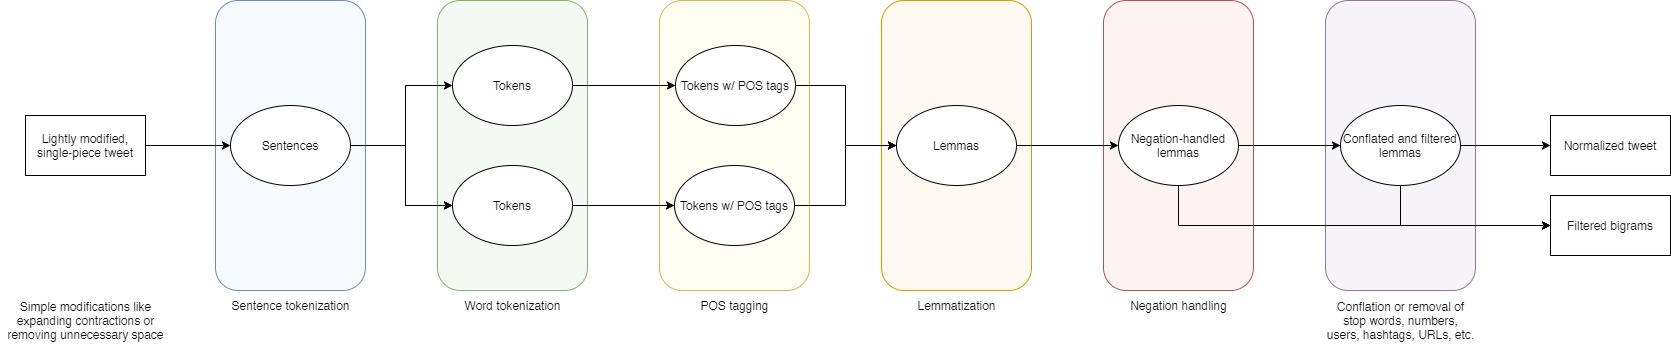

### Discussion Question

* Which parts of the tweets removed could be useful? Come up with some arguments for keeping them.

# Özkan Tuğberk Kartal Start

I think hashtags could have been useful. For example, a tweet starting with "#FEMA acknowledges #PuertoRico lacks rebuilt ..." actually involves the information about Federal Emergency Management Agency (FEMA) and an autonomous country which is PuertoRico but we cannot benefit from this information since we have unhappily filtered hashtags. So it would have been better to keep hashtags. In addition, I think user handles could have been kept since they may contain some the nicks of famous people that had or died from Covid and these nicks might have been correlated with the countries.

# Özkan Tuğberk Kartal Finish

* Think of why looking into pairs of words could be important as opposed to individual words?

# Özkan Tuğberk Kartal Start

An example will clarify this. Let's consider the word "Jam". If it can be used with the word "Strawbery" to consitute the phrase "Strawbery jam", we can easily understand that this phrase corresponds to a meal that can be eaten via a spoon. On the other hand, if it can be used with the word "Signal" to consitute the phrase "Jam signal", we can easily understand that this phrase corresponds to a magnetic waveform that can be used to deflect IR guided missiles. So, instead of using the word "Jam" as individual, it would be better to use it in pairs of words since its meaning depends on the context, i.e. its paired word.

# Özkan Tuğberk Kartal Finish



> Answers can be written here by double clicking and editing the text.

## Sentiment analysis<a id="sentiment"></a>

We can automatically detect the sentiment of words (and therefore sentences) without the need of manually reading labeling all the data. This can be especially useful for contents that target specific products or people, but we can apply this to our dataset as well.

Sentiment analysis can be done using rules or data driven models. In this lab session, we will simply use NLTK's sentiment analyzer that uses [VADER tool and lexicon](https://www.semanticscholar.org/paper/VADER%3A-A-Parsimonious-Rule-Based-Model-for-Analysis-Hutto-Gilbert/bcdc102c04fb0e7d4652e8bcc7edd2983bb9576d).

Lexicons are collections of words designed for specific purposes and making sense of textual data in general. They can be about sentiments, emotions, or other purpose-specific words (plants, animals, etc.). We could collect positive words (such as "nice" and "wonderful") in a file, and check if a sentence has words from that file, indicating whether they are associated with positive sentiments. This would be our positive words lexicon.

Alternatively, we could collect words that have a sentiment value (valence), and assign sentiment scores for them. So, we could assign "great" to "1" (positive) and "terrible" to "-1" (negative). VADER actually works like this. It is a word list that is manually rated by different individuals to obtain mean sentiment scores for each word. Naturally, there are other things to consider as well. For example, apart from negation, the existence of certain words also modify the sentiment's intensity ("bad" becomes even more negative with the word "very"). VADER handles these (and more) for us, so we can simply tokenize sentences and feed them to the analyzer to retrieve the normalized (between -1 and 1) sentence-level sentiment scores:

In [132]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

# Notice how sentiment scores differ for the following sentences:
sentences = ["It looks VERY BAD!!!",
             "It looks VERY BAD.",
             "It looks very bad.",
             "It looks bad.",
             "It does not look very bad.",
             "It does not look bad.",
             "It looks good.",
             "It looks good!",
             "It looks VERY BAD!!! It looks good!"]

for sentence in sentences:
    # It retrieves separate scores for negativity, neutrality, and positivity, but we
    # can generally simply use the compound score as well.
    print(sentence,sentiment_analyzer.polarity_scores(sentence))

It looks VERY BAD!!! {'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.7984}
It looks VERY BAD. {'neg': 0.637, 'neu': 0.363, 'pos': 0.0, 'compound': -0.7398}
It looks very bad. {'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}
It looks bad. {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
It does not look very bad. {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.4708}
It does not look bad. {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}
It looks good. {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
It looks good! {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4926}
It looks VERY BAD!!! It looks good! {'neg': 0.449, 'neu': 0.349, 'pos': 0.202, 'compound': -0.6733}


It is decent especially considering its ease of use. Note that the last example does not work so well, because we did not separate those two sentences.

We can write a function that separates the sentences, computes their sentiment scores, and averages those scores:

In [133]:
# This function optionally takes tokenizer and analyzer objects. This is not needed,
# but it can help with portability.
def analyze_sentiment(tweet, sentence_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle'),
                      sentiment_analyzer=SentimentIntensityAnalyzer()):

    # Sentences are tokenized:
    sentences = sentence_tokenizer.tokenize(tweet)

    # Remember that tweets have hashtags, URLs, etc. that may confuse sentiment
    # analysis process and pull the sentiment towards the middle. A sentiment score
    # is not retrieved if the sentence has no sentiment and it has less than four
    # tokens (including punctuation). So that a URL would not affect the sentiment
    # while genuinely neutral sentences, given that they are long enough, would not
    # be disregarded. Some of the processes we have used (such as URL removal) could
    # be applied here as well. Feel free to play with its logic.
    sentiments = [sentiment_analyzer.polarity_scores(sentence)["compound"] for sentence in sentences
                  if sentiment_analyzer.polarity_scores(sentence)["compound"] != 0 or len(tokenizer.tokenize(sentence)) > 3]

    # Returns the average compound sentiment score if a sentiment is detected.
    if sentiments:
        return sum(sentiments)/len(sentiments)
    # Returns 0 if a sentiment is not detected:
    else:
        return 0

# One sentence is negative and the other is positive while the general tone is closer
# to being negative:
analyze_sentiment("It looks VERY BAD!!! It looks good!", sentence_tokenizer, sentiment_analyzer)

-0.1529

This is much better. We can now apply this function the dataset and obtain the average sentiment score of each tweet:

In [134]:
dataset["sentiment"] = dataset["text"].map(analyze_sentiment)

dataset[["text", "sentiment"]].head(25)

text  \
0   Praying for good health and recovery of @ChouhanShivraj . #covid19 #covidPositive                                                              
1   July 25 #COVID19 update #TamilNadu - 6988 Discharge- 7758 People tested - 61729 Actice cases - 52273 #chennai - 1329                           
2   Second wave of #COVID19 in Flanders..back to more #homework again... https://t.co/9swImZACMN                                                   
3   Holy water in times of #COVID19 https://t.co/YaZ49yxL27                                                                                        
4   #FEMA acknowledges #PuertoRico lacks rebuilt homes and a hospital to survive #COVID19 https://t.co/PLXqKc5K5d                                  
5   Actionables for a healthy recovery from #COVID19 #climate https://t.co/crGlKZOz5Z                                                              
6   Volume for those at the back please. 🔊 #COVID19 https://t.co/d0pn2Bv2Hx                                                                        
7   Why has Ruto not eulogisied Mkapa!! Asking for Moses Kuria Raila #RutoSwindlingGEMA #COVID19                                                   
8   Crazy that the world has come to this but as Americans we will fight to get through this!🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸 #covid19                                   
9   @jimsciutto @JoAnnBaldwin55 People whose relatives have died from #COVID19 should file a class action lawsuit against Sinclair Broadcasting.   
10  I miss isopropyl alcohol so much!!!! Ethanol in hand sanitizer smells like I poured tequila on my hands 🤢 #COVID19                             
11  @SonuSood sir mom is in ICU due to COVID just want prayers from you and everyone who is listening you . #COVID19                               
12  While you at it, please follow me https://t.co/KheirQEh6Z #Fergusons #DurbanJuly #alreadyvideo #COVID19 #WiseUp https://t.co/h1TYdOgjwv        
13  2,000 women lawyers write to #AmitShah seeking 5 Lakh Loan per financially drained lawyer. #COVID19 #Coronavirus https://t.co/JEjVTeCjEn       
14  Let us give it a try #alreadyvideo #COVID19 #HurricaneHanna https://t.co/2HChuAfNHy                                                            
15  The Egyptians are not got shit on this. #COVID19 https://t.co/kl5lzOJaxO                                                                       
16  Not only is the area about to be hit by #hanna a #COVID19 hotspot, but Hurricane Harvey work is ongoing. Still.                                
17  1.28% of the YOU.S. population is infected with Covid-19 #COVID19 #TrumpVirus #MaskItOrCasket                                                  
18  .@headout with a dashboard to boost post-#COVID19 #travel https://t.co/0gnRgqvLlh                                                              
19  Highest ever number of new cases yesterday #coronavirus #covid19 #STAYatHOME https://t.co/oovQrvMviY                                           
20  @bubbaprog 350 school employees exposed to #COVID19 in Manatee County schools over the summer https://t.co/GxiYb61ay0                          
21  @BenJamesPhotos Italy #BenPC #LOCKDOWNPHOTOCHALLENGE #COVID19 https://t.co/27jyDBhbMc                                                          
22  If CM of Madhya Pradesh is tested positive for COVID, then Scindia should also be tested for #COVID19.                                         
23  Bihar witnesses biggest single-day spike of 2,803 new #Covid19 cases https://t.co/zTPksALE7T https://t.co/979SPKzt3w                           
24  Lunch in #Amsterdam away from the mass tourists that have invaded so quickly during the #COVID19 pandemic ! #travel https://t.co/DBCPWA0Ao9    

    sentiment  
0   0.65970    
1   0.00000    
2   0.00000    
3   0.00000    
4   0.00000    
5   0.40190    
6   0.31820    
7   0.00000    
8  -0.65880    
9  -0.67050    
10  0.13775    
11  0.07720    
12  0.31820    
13 -0.36120    
14  0.00000    
15  0.44490    
16  0.00000    
17 

It is not perfect as you can see, but it is much more reliable at the extremes:

In [135]:
dataset[["text", "sentiment"]].sort_values('sentiment', ascending=False).head(5)

text  \
33212  Extremely worthwhile article 👇 with super valuable info that can help you or a loved one survive #COVID19 👇👇👇 https://t.co/giOxdQSZZ0        
23488  I have booked 4 sessions - super value and super talented smart #women in the time of #covid19 https://t.co/uexC6DcdZd                       
35358  Great to see the growth of #virtual chapter events as ways of engaging during #COVID19 good luck! https://t.co/xsnXA1J6hw                    
35353  Great to see the growth of #virtual chapter events as ways of engaging during #COVID19 good luck! https://t.co/nvYV7o7MFt                    
19047  @BreesAnna Great interview Anna and such a pleasant change to hear someone talking sensible about #COVID19 Hope you have wonderful weekend   

       sentiment  
33212  0.9459     
23488  0.9451     
35358  0.9359     
35353  0.9359     
19047  0.9325

In [136]:
dataset[["text", "sentiment"]].sort_values('sentiment').head(5)

text  \
34980  @OfficialRedSide @MSNBC Just the fake president who raped women is a racist and does not care about the people that died of #COVID19        
20590  Failure after failure, lie after lie by this stinking, rotten corrupt shower of shit we have for a Govt. #COVID19 https://t.co/IhkenBP2Hg   
35399  Violence and abuse against shop workers doubles during #COVID19 pandemic - wtf is wrong with people!! https://t.co/xBckn6IBNq               
31704  https://t.co/m3B4eKyGTg Sighhhhhhhhhhhhhhhhhhh :( :( :( :( :( :( #covid19                                                                   
36     @TheDailyEdge @seanhannity @FoxNews So he can spread lies, hate, sexual violence, and murder. #COVID19 #FoxNews                             

       sentiment  
34980 -0.9579     
20590 -0.9552     
35399 -0.9500     
31704 -0.9468     
36    -0.9460

We can now use these sentiment scores with other analyses. You are encouraged to explore these tweets and other methods for analysis.

Note that there are some important limitations. A word can have different meanings in different domains/contexts. Consider these sentences:

* This song is **sick**. → Nice.👍
* This child is **sick**. → Not nice.👎

Sometimes, a word can have one meaning yet different implications. Consider these sentences:

* The patient had a **positive** experience. → Nice.👍
* The patient had a **positive** test result for COVID-19. → Not nice.👎

You might want to make adjustments or use your own lexicon for a specific topic/task. You can also train a model to guess the sentiment. [Check](https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386) this example.

If you are interested in lexicon-based approaches, take a look at [EmoLex](https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm), a lexicon for emotions and sentiment. It can be used to automatize emotion detection. It also has Turkish words (along with some other languages), but they are an automatic translation, so they are not as reliable. You can now directly download it from its web page.

## Bonus: Levenshtein distance<a id="levenshtein"></a>

As mentioned above, a simple autocorrection process can be applied using the Levenshtein distance. Let us see what that means.

Consider the words `cup` and `cap`. Their Levenshtein distance is 1, because we can obtain one from the other by simply substituting a character. For two given strings, we can calculate the number of operations required (edit distance) to obtain one from the another. These operations are:

* Insertion: Inserting a character to a specific location in the string.
    * "up" becomes "**c**up"
* Deletion: Deleting a character from a specific location in the string.
    * "cu**s**p" becomes "cup"
* Substitution: Substituting a character in a specific location in the string with another character.
    * "c**u**p" becomes "c**a**p"
* Transpotisition (this is later introduced by an extension, the Damerau-Levenstein distance algorithm): Switching the positions of two adjacent characters.
    * "c**pu**" becomes "c**up**"
    
Using these, for a given word, we can find the closest word from a dictionary that would require the least amount of changes. This is a costly process, so it is usually limited to certain amount of changes. See [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) for more information.

We can also use this distance to calculate the similarity between two strings. This is handy for fuzzy string matching, when the same thing can be represented in similar yet different forms. This is quite common in neighborhood or street names in Turkey. By setting a similarity threshold and looking at their similarity, we can match addresses like `Kemalpaşa Mah.` and `Kemal Paşa Mahallesi`.

In [137]:
import Levenshtein

string_a = "Kemalpaşa Mah."
string_b = "Kemal Paşa Mahallesi"

Levenshtein.ratio(string_a, string_b)
# Note that you would probably want to remove "mahallesi" or "mah." when your task is
# address matching. It would significantly increase your success.

0.7058823529411764

A use case for our dataset could be finding tweets that are similar to each other. Let us search for a tweet pair that has the highest similarity without being exactly the same:

In [141]:
pair = None
highest = 0

tweets_to_compare = 100
# To compare all the tweets, uncomment this line. Note that it would take much longer.
# tweets_to_compare = dataset.shape[0]
# This compares each tweet with the ones that come after itself, which takes some time.
for i in range(0, tweets_to_compare-1):
    for j in range(1, tweets_to_compare):
        # If the tweets are not the same:
        if dataset.loc[i,"text"] != dataset.loc[j,"text"]:
            similarity = Levenshtein.ratio(dataset.loc[i,"text"], dataset.loc[j,"text"])

            # If their similarity is higher than the previous similarities:
            if similarity > highest:

                highest = similarity
                pair = (dataset.loc[i,"text"], dataset.loc[j,"text"])

print(f"The most similar tweet pair: {pair}")
print(f"Similarity: {highest}")

The most similar tweet pair: ('395 new cases and 3 new deaths in Uzbekistan [13:22 GMT] #coronavirus #CoronaVirusUpdate #COVID19 #CoronavirusPandemic', '1,005 new cases and 18 new deaths in the United States [13:16 GMT] #coronavirus #CoronaVirusUpdate #COVID19 #CoronavirusPandemic')
Similarity: 0.8699186991869918


### Discussion Question

* Imagine extending the above exercise to the entire dataset. (Or try it yourself.) <br> What can be changed to accelerate this? Look through the [Levenshtein](https://rapidfuzz.github.io/Levenshtein/levenshtein.html) documentation for clues.

> Answers can be written here by double clicking and editing the text.

* Özkan Tuğberk Kartal Start

The documentation suggests score_hint parameter to be set a value other than None to have a faster implementation.  

* Özkan Tuğberk Kartal Finish


## Bonus: NLP in Turkish<a id="tr"></a>

From a linguistic perspective, Turkish is a fascinating language with its rather strict grammatical rules. However, due to its agglutinative nature, words can easily become complex with many affixes and inflections. This can make morphological analyses harder compared to English.

### Stemming<a id="tr-stem"></a>

[snowballstemmer](https://pypi.org/project/snowballstemmer/) has a Turkish stemmer:

In [142]:
from snowballstemmer import TurkishStemmer

stemmer_tr = TurkishStemmer()

sentence = "Gözleme gözleyen gözlüklü gözcü gözden düştü."

[stemmer_tr.stemWord(token) for token in tokenizer.tokenize(sentence)]

['gözle', 'gözleye', 'gözlüklü', 'gözcü', 'göz', 'düş', '.']

### POS tagging and lemmatization<a id="tr-pos-lemma"></a>

It looks like the morphological analyzer of [Zemberek](https://github.com/ahmetaa/zemberek-nlp), the famous Turkish NLP tool for Java, has been unofficially ported to Python as [zeyrek](https://github.com/obulat/zeyrek/). It does not have all of its original features (like disambiguation and more), but we can still use it to morphologically analyze a word, sentence, or sentences:

In [143]:
from zeyrek import MorphAnalyzer, rulebasedanalyzer
import logging.config

# Disables redundant error messages from zeyrek
logging.config.dictConfig({
    'version': 1,
    'disable_existing_loggers': True,
})

analyzer = MorphAnalyzer()

import functools
import operator

def format_groups(groups):
    # This function flattens the list of lists,
    # removes redundant columns and, outputs a dataframe
    out = functools.reduce(operator.iconcat, groups, [])
    lines = []
    for item in out:
        item = item._asdict()
        item.pop('morphemes')
        lines.append(item)

    return pd.DataFrame(lines)

format_groups(analyzer.analyze(sentence))

# This also explicitly returns tokenized sentences if you prefer:
# analyzer._analyze_text(sentence)

word     lemma   pos  \
0   Gözleme   gözlemek  Verb   
1   Gözleme   gözlem    Noun   
2   Gözleme   Gözlem    Noun   
3   Gözleme   gözleme   Noun   
4   Gözleme   gözlemek  Noun   
5   gözleyen  gözlemek  Adj    
6   gözlüklü  gözlük    Adj    
7   gözlüklü  göz       Adj    
8   gözcü     gözcü     Noun   
9   gözcü     göz       Noun   
10  gözden    göz       Noun   
11  gözden    Gözde     Noun   
12  gözden    gözde     Noun   
13  gözden    gözde     Noun   
14  düştü     düşmek    Verb   
15  düştü     düş       Verb   
16  .         .         Punc   

                                                  formatted  
0   [gözlemek:Verb] gözle:Verb+me:Neg+Imp+A2sg               
1   [gözlem:Noun] gözlem:Noun+A3sg+e:Dat                     
2   [Gözlem:Noun,Prop] gözlem:Noun+A3sg+e:Dat                
3   [gözleme:Noun] gözleme:Noun+A3sg                         
4   [gözlemek:Verb] gözle:Verb|me:Inf2→Noun+A3sg             
5   [gözlemek:Verb] gözle:Verb|yen:PresPart→Adj              
6   [gözlük:Noun] gözlük:Noun+A3sg|lü:With→Adj               
7   [göz:Noun] göz:Noun+A3sg|lük:Ness→Noun+A3sg|lü:With→Adj  
8   [gözcü:Noun] gözcü:Noun+A3sg                             
9   [göz:Noun] göz:Noun+A3sg|cü:Agt→Noun+A3sg                
10  [göz:Noun] göz:Noun+A3sg+den:Abl                         
11  [Gözde:Noun,Prop] gözde:Noun+A3sg+n:P2sg                 
12  [gözde:Noun] gözde:Noun+A3sg+n:P2sg                      
13  [gözde:Adj] gözde:Adj|Zero→Noun+A3sg+n:P2sg              
14  [düşmek:Verb] düş:Verb+tü:Past+A3sg                      
15  [düş:Noun] düş:Noun+A3sg|Zero→Verb+tü:Past+A3sg          
16  [.:Punc] .:Punc

Since some words can have different morphological explanations, every alternative is retrieved. From this, we can obtain lemmas and POS tags as you can see. However, simply using the first explanation for a word may not yield the correct result:

We can also simply use `analyzer.lemmatize()` to lemmatize the words. Again, it returns all possible lemmas without disambiguation:

In [144]:
analyzer.lemmatize(sentence)

[('Gözleme', ['gözlemek', 'gözleme', 'gözlem', 'Gözlem']),
 ('gözleyen', ['gözlemek']),
 ('gözlüklü', ['gözlük', 'göz']),
 ('gözcü', ['gözcü', 'göz']),
 ('gözden', ['gözde', 'göz', 'Gözde']),
 ('düştü', ['düşmek', 'düş']),
 ('.', ['.'])]

### Dealing with Turkish characters<a id="tr-encoding"></a>

A past Turkish government's short-sightedness in the 80's is haunting programmers who work with Turkish texts to this day. To prevent some Turkish characters from deforming, we need to read and write files using the "UTF-8" encoding. However, this may not be enough if your data is not saved as "UTF-8" in the first place. Sometimes, you may realize that certain characters in your dataset itself is not properly represented. For example, instead of the word `kılıç`, you may see `kÄ±lÄ±Ã§`. This may suggest that your data is saved in "Latin-1" (also known as "ISO 8859-1"), which is the most common encoding in the Western world and the standard for many protocols. To fix it, you can specify the encoding of the string as "latin-1" (or "ISO 8859-1") and then decode it to "UTF-8" as shown below:

In [145]:
badly_encoded = "kÄ±lÄ±Ã§"
encoding_fixed = badly_encoded.encode("latin-1").decode("utf-8")

encoding_fixed

'kılıç'

Hopefully, this will solve your problem. If not, you can also find the deformed characters and write a function that replaces all of those characters with the correct ones.

Keep in mind that Turkish characters can also cause some packages or languages to raise an error. You may also see that the fonts used by some packages may not support these characters and plot `□` instead. Therefore, you may want to anglicize Turkish characters to prevent these. Here is a function that does that for you.

In [146]:
# Changes all Turkish characters with their simpler versions:
def anglicize_turkish(text):
    return text.translate(text.maketrans({"Ğ": "G", "ğ": "g", "Ü": "U", "ü": "u", "Ş": "S", "ş": "s", "İ": "I", "ı": "i", "Ö": "O", "ö": "o", "Ç": "C", "ç": "c"}))

anglicize_turkish("kılıç")

'kilic'

Another problem is the built-in functions that lowercase or uppercase your text may not work properly with Turkish text, even if your system locale is Turkish. For example, the lowercase version of `KILIÇ` is normally returned as `kiliç`, since "I" corresponds to "i" in the Western languages. Instead of dealing with locales (which may not solve your problem anyway), a simple solution is to manually lowercase/uppercase the problematic letters and then use the built-in function:

In [147]:
def turkish_lowercase(text):
    return text.translate(text.maketrans({"I": "ı"})).lower()

def turkish_uppercase(text):
    return text.translate(text.maketrans({"i": "İ"})).upper()

print("Built-in lowercase for KILIÇ:", "KILIÇ".lower())
print("Custom lowercase for KILIÇ:", turkish_lowercase("KILIÇ"))
print("Built-in uppercase for isim:", "isim".upper())
print("Custom uppercase for isim:", turkish_uppercase("isim"))

Built-in lowercase for KILIÇ: kiliç
Custom lowercase for KILIÇ: kılıç
Built-in uppercase for isim: ISIM
Custom uppercase for isim: İSİM


### Discussion Question

* [HuggingFace](https://huggingface.co) is a platform where organizations and people share open weight deep learning models, datasets and more.<br><br> Do a quick search on HuggingFace for current representation of Turkish in NLP. (Note that this won't be representative of actual research.) <br> How recent is the most downloaded model? What datasets were used for training or finetuning in general?

# Özkan Tuğberk Kartal Start

When typing "Turkish" in the Hugging Face Search Bar and sort the results with most downloads, the page becomes as in the following link (date is 25/02/2025): https://huggingface.co/models?sort=downloads&search=turkish. We can see that "emrecan/bert-base-turkish-cased-mean-nli-stsb-tr" is the most downloaded model with update date 25/01/2022. In its website (https://huggingface.co/emrecan/bert-base-turkish-cased-mean-nli-stsb-tr), it is written that the datasets used to train are named as emrecan/stsb-mt-turkish (https://huggingface.co/datasets/emrecan/stsb-mt-turkish) and boun-tabi/nli_tr (https://huggingface.co/datasets/boun-tabi/nli_tr).

# Özkan Tuğberk Kartal Finish


* What is the benefit of having NLP models specific to Turkish?

# Özkan Tuğberk Kartal Start

There will be less dependence to the datasets abroad which sometimes require high pricings to download and which might not reflect the characteristics of the situations in Turkey. Moreover, sometimes local datasets (patient data, Turkish product (Turkish delight, ayran, baklava, hazelnut, fig, etc.) statistics) are superior than the global ones.

# Özkan Tuğberk Kartal Finish

> Answers can be written here by double clicking and editing the text.

## More information<a id="more-info"></a>

* [NLTK documentation](https://www.nltk.org/)
* [TextBlob](https://textblob.readthedocs.io/en/dev/): A library written on NLTK. You may want to look at this as well since certain tasks can be easier with TextBlob.
* [spaCy](https://github.com/explosion/spaCy): Another popular NLP library.
* [Stanza](https://stanfordnlp.github.io/stanza/): An NLP library with a language-agnostic pipeline that makes use of neural networks. It also provides an interface for [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), a popular NLP library for Java. It supports Turkish. You can check how it works with Turkish (or any other language) from [here](http://stanza.run/).
* If you are interested in linguistics, you can take a look at [the course catalog of Cognitive Science Department at METU](https://catalog.metu.edu.tr/prog_courses.php?prog=902) as they have some specialized courses.
* [Social media text normalization for Turkish](https://www.cambridge.org/core/journals/natural-language-engineering/article/social-media-text-normalization-for-turkish/6BADFEB835E28ABC03CDC472B2BAA6AB)

If you have questions, feel free to send an e-mail.